# Exercises Meta Heuristics

In [63]:
from random import Random  # type: ignore                                             # Random number generator
import math  # type: ignore                                                           # Mathematical functions
import pandas as pd  # type: ignore                                                   # Data manipulation
import numpy as np  # type: ignore                                                    # Scientific computing
import matplotlib.pyplot as plt  # type: ignore                                       # Data visualization
from scipy.stats import binom as binomial  # type: ignore                             # Binomial distribution
from scipy.stats import norm as normal  # type: ignore                                # Normal distribution
from scipy.stats import poisson as poisson  # type: ignore                            # Poisson distribution
from scipy.stats import t as student  # type: ignore                                  # Student distribution
from scipy.stats import chi2  # type: ignore                                          # Chi-squared distribution
from scipy.stats import ttest_1samp  # type: ignore                                   # One-sample t-test
from scipy.stats import chisquare  # type: ignore                                     # Chi-squared test
from scipy.special import comb  # type: ignore                                        # Combinations
from mlxtend.frequent_patterns import apriori  # type: ignore                         # Apriori algorithm
from mlxtend.frequent_patterns import fpgrowth  # type: ignore                        # FP-growth algorithm
from mlxtend.frequent_patterns import association_rules  # type: ignore               # Association rules
from mlxtend.preprocessing import TransactionEncoder  # type: ignore                  # Transaction encoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # type: ignore  # Discriminant Analysis
from tensorflow import keras  # type: ignore                                          # Deep Learning library
from tensorflow.keras import Model  # type: ignore                                    # Model class
from tensorflow.keras.layers import Input, Dense, BatchNormalization  # type: ignore  # Layers
from tensorflow.keras.utils import to_categorical  # type: ignore                     # One-hot encoding
from tensorflow.keras.optimizers import Adam  # type: ignore                         # Optimizer
from livelossplot import PlotLossesKeras  # type: ignore                              # Live plot
from keras.src.optimizers import RMSprop  # type: ignore                              # Optimizer
from sklearn.model_selection import train_test_split  # type: ignore                  # Train-test split
from simanneal import Annealer  # type: ignore                                        # Simulated Annealing
from inspyred import ec  # type: ignore                                                # Evolutionary Computation
import warnings  # type: ignore                                                       # Disable warnings
from Resources.Functions import *  # type: ignore                                     # Custom functions
warnings.filterwarnings("ignore")

# Guidelines
- To solve the problems below, always use simulated annealing and genetic algorithms. So you always provide two solutions. If you have the Tabu search Once implemented, you can even develop a third solution.
- You always have to write a cost function (objective function) yourself that is focused on the problem. You can reuse the cost function for the Simulated Annealing for the genetic algorithms. Note how the objective function should be optimized. You can - if necessary - add a minus sign and/or use rounding.
- Don't forget to also write a function that identifies other solution(s) somewhere in the solution space (e.g. random) or near the current solution(s).
- Experiment with some parameters such as the chance of crossover, or mutation in genetics algorithms.
- In some assignments it is best to also provide lower and upper limits (lower and upper).

## Theoretical questions

### Question 0: Simulated Annealing
The simulated annealing algorithm is a probabilistic optimization algorithm that is used to find the global optimum of a function. The algorithm is inspired by the annealing process in metallurgy, where a material is heated and then slowly cooled to increase the size of its crystals. The algorithm works by starting at a random point in the search space and then iteratively moving to a new point in the search space. The algorithm accepts moves to new points that improve the objective function value, but also accepts moves to points that decrease the objective function value with a certain probability. This probability decreases over time, allowing the algorithm to escape local optima and find the global optimum.

$$ P(\text{accept worse}) = e^{-\frac{\Delta E}{T}} $$

#### 0.1. Simulated Annealing

In [64]:
class RastriginProblem(Annealer):
    def energy(self):
        x1 = self.state[0]
        x2 = self.state[1]
        sum = (10 * 2 + x1**2 + x2**2)
        sum = sum - 10 * math.cos(2 * math.pi * x1) - 10 * math.cos(2 * math.pi * x2)
        return sum # Maximize = return -sum

    def move(self):
        i = np.random.randint(0,2) # Randomly select a dimension (between 0 and 1)
        self.state[i] += np.random.normal(0, 0.1)
        self.state[i] = np.clip(self.state[i], -5.12, 5.12)

initial_state =  np.random.uniform(-5.12,5.12, size=2)
rastrigin = RastriginProblem(initial_state)

rastrigin.Tmax = 25000.0                # Max (starting) temperature
rastrigin.Tmin = 2.5                    # Min (ending) temperature
rastrigin.updates = 10                  # Number of updates (On the screen)
rastrigin.steps = 100000                # Number of iterations
route, distance = rastrigin.anneal()    # Start the annealing

print(f"Route: {route}\nDistance: {distance}")

 Temperature        Energy    Accept   Improve     Elapsed   Remaining


Route: [-0.01767374  0.01017662]
Distance: 0.08244585710110464


#### 0.2. Genetisch Algoritme

Route: [-0.00344278 -0.00216372]
Distance: 0.003280194464011288


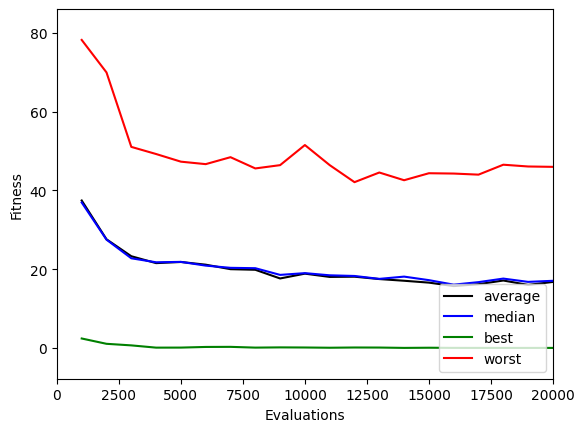

In [65]:
def generate(random = None, args = None):
    size = args.get('num_inputs',2)
    return np.random.uniform(low=-5.12, high=5.12, size=size)

def evaluate(candidates, args = None):
    fitness = []
    for candidate in candidates:
        sum = 10 * len(candidate)
        for i in range(0, len(candidate)):
            sum = sum + (candidate[i] ** 2 - 10 * math.cos(2 * math.pi * candidate[i]))
        fitness.append(sum)
    return fitness

rand = Random()
ga = ec.GA(rand)
ga.terminator = ec.terminators.evaluation_termination
ga.variator = [ec.variators.arithmetic_crossover, ec.variators.gaussian_mutation]
ga.observer = ec.observers.plot_observer
population = ga.evolve(
    generator=generate,
    evaluator=evaluate,
    selector = ec.selectors.fitness_proportionate_selection,
    pop_size=1000,
    maximize=False, # Minimize
    bounder=ec.Bounder(-5.12, 5.12),
    max_evaluations=20000,
    mutation_rate=0.25,
    num_inputs=2)
population.sort(reverse=True)

print(f"Route: {population[0].candidate}\nDistance: {population[0].fitness}")

### Question 0: Traveling Salesman
The traveling salesman problem (TSP) is a classic optimization problem where the goal is to determine the shortest tour of a collection of `n` "cities" (i.e. nodes), visiting each city exactly once and returning to the starting city. The distance between each pair of cities is known, and the goal is to find the shortest possible tour that visits each city exactly once and returns to the starting city.

$$ \text{Minimize} \sum_{i=1}^{n} \sum_{j=1}^{n} c_{ij} \cdot x_{ij} $$


![Traveling Salesman](Images/travelingSalesman.png)

In [72]:
# Matrix where the distances between the cities are stored (The matrix is symmetric)
# 2 dimensions (5*5) (x,y)
distance_matrix = np.array([[0, 100, 125, 100,  75],
                            [100, 0,  50,  75, 100],
                            [125, 50,  0, 100, 125],
                            [100, 75, 100,   0, 50],
                            [75, 100, 125,  50,  0]])

#### 0.1. Simulated Annealing

In [73]:
class TravellingSalesmanProblem(Annealer):
    def energy(self): # Calculates the length of the route.
        dist = 0
        for i in range(len(self.state)):
            dist += distance_matrix[self.state[i - 1], self.state[i]]
        return dist

    def move(self): # Swaps two cities in the route.
        a = np.random.randint(0, len(self.state) - 1)
        b = np.random.randint(0, len(self.state) - 1)
        self.state[a], self.state[b] = self.state[b], self.state[a]

initial_state = [0, 4, 1, 3, 2] # Random initial route 0 -> 4 -> 1 -> 3 -> 2 (Index of the cities)
route, distance = TravellingSalesmanProblem(initial_state).anneal()

print(f"Route: {route}\nDistance: {distance}")

 Temperature        Energy    Accept   Improve     Elapsed   Remaining


Route: [0, 4, 3, 1, 2]
Distance: 375


#### 0.2. Genetisch Algoritme

In [78]:
def obj_func(solution, weights):
    n = int(math.sqrt(len(solution)))
    leaveOK = np.empty((n, 1), dtype=int)
    for i in range(0, n):
        index = range(i, n * n, n)
        leaveOK[i] = 0
        for j in index:
            leaveOK[i] = leaveOK[i] + solution[j]
    arriveOK = np.empty((n, 1), dtype=int)
    for i in range(0, n):
        index = range(i * n, (i + 1) * n, 1)
        arriveOK[i] = 0
        for j in index:
            arriveOK[i] = arriveOK[i] + solution[j]
    index = range(0, n * n, n + 1)
    notStayingOK = 0
    for j in index:
        notStayingOK = notStayingOK + solution[j]
    loop_length = 0
    city = 0
    in_loop = True
    while in_loop & (loop_length < n + 1):
        loop_length = loop_length + 1
        index = range(city * n, (city + 1) * n, 1)
        next_city = 0
        while (solution[index[next_city]] == 0) & (next_city < n - 1): next_city = next_city + 1
        in_loop = (next_city != 0) & (solution[index[next_city]] == 1)
        city = next_city
    if ((notStayingOK == 0) & (np.min(arriveOK) == 1) & (np.max(arriveOK) == 1) & (np.sum(arriveOK) == n)
            & (np.min(leaveOK) == 1) & (np.max(leaveOK) == 1) & (np.sum(leaveOK) == n)
            & (loop_length == n)):
        score = np.sum(np.multiply(solution, weights))
    else:
        score = 1000 * n + np.sum(np.multiply(solution, weights))
    return score

distance_matrix = distance_matrix.reshape([25])

In [79]:
def generate(random = None, args = None):
    size = args.get('num_cities', 5)
    solution = np.zeros(size * size, dtype=int)
    for i in range (0, size):
        j = np.random.randint(low=0, high=size)
        solution[i * size + j] = 1
    return solution.tolist()

def evaluate(candidates, args = None):
    weights = args.get('distance_matrix')
    fitness = []
    for candidate in candidates:
        fitness.append(obj_func(candidate, weights))
    return fitness

rand = Random()
ga = ec.GA(rand)
ga.terminator = ec.terminators.evaluation_termination
ga.variator = [ec.variators.n_point_crossover, ec.variators.bit_flip_mutation]  
population = ga.evolve(
    generator=generate,
    evaluator=evaluate,
    selector = ec.selectors.fitness_proportionate_selection,
    pop_size=1000,
    maximize=False,
    bounder=ec.Bounder(0, 1),
    max_evaluations=1000,
    mutation_rate=0.01,
    num_cities=5,
    distance_matrix=distance_matrix)
population.sort(reverse=True)

print(f"Route: {route}\nDistance: {distance}")

Route: [0, 4, 3, 1, 2]
Distance: 375


### Question 1: The Backpack
You will find yourself in a **secret room** equipped with a door with a **time lock**. You'll see a timer countdown telling you that you only have five minutes left before the door will be locked forever. In front of you are **valuable objects**, each with their own **yield and weight**. You have a backpack that can carry an absolute maximum weight of `750 grams`. Put together the optimal backpack. You should end up with an optimal yield of `1458` (or at least a value close to that).

$$ \text{Maximize} \sum_{i=1}^{n} v_i \cdot x_i $$

In [ ]:
knapsackItems = pd.read_csv('../Data/KnapsackItems.csv', sep=',')
display(knapsackItems.head())

#### 1.1. Simulated Annealing

In [98]:
class TheBackpackProblem(Annealer):
    def energy(self):
        solution = self.state
        total_weight = (solution * weight_items).sum()
        if total_weight > 750:
            total_value = 0
        else:
            total_value = (solution * value_items).sum()
        return -total_value
    
    def move(self):
        i = np.random.randint(0, len(self.state))
        self.state[i] = not self.state[i] # not = -1

weight_items = knapsackItems['Gewichten(gr)']
value_items = knapsackItems['Waarde']
initial_state = np.random.choice([0,1], size=len(weight_items)) # Size = all rows of the dataframe (CSV)
route, distance = TheBackpackProblem(initial_state).anneal()

print(f"Route: {route}\nDistance: {-distance}")

 Temperature        Energy    Accept   Improve     Elapsed   Remaining


Route: [1 0 1 0 1 0 1 1 1 0 0 0 0 1 1]
Distance: 1458


#### 1.2. Genetisch Algoritme

Route: [0 0 0 0 0 1 1 0 0 1 0 1 1 1 1]
Distance: 1441


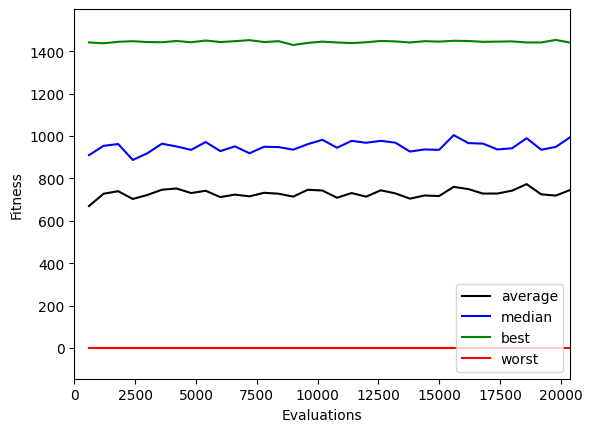

In [99]:
def generate(random = None, args = None):
    return np.random.choice([0,1], size=len(args.get('weight_items'))) # Size = all rows of the dataframe (CSV)

def evaluate(candidates, args = None):
    fitness = []
    for candidate in candidates:
        total_weight = (candidate * args.get('weight_items')).sum()
        
        if total_weight > 750:
            total_value = 0
        else:
            total_value = (candidate * args.get('value_items')).sum()
        fitness.append(total_value)
    return fitness

rand = Random()
ga = ec.GA(rand)
ga.terminator = ec.terminators.evaluation_termination
ga.variator = [ec.variators.n_point_crossover, ec.variators.bit_flip_mutation]
ga.observer = ec.observers.plot_observer
population = ga.evolve(
    generator=generate,
    evaluator=evaluate,
    selector = ec.selectors.fitness_proportionate_selection,
    pop_size=600,
    maximize=True, # Maximize
    bounder=ec.Bounder(0, 1),
    max_evaluations=20000,
    mutation_rate=0.25,
    weight_items=knapsackItems['Gewichten(gr)'],
    value_items=knapsackItems['Waarde'])
population.sort(reverse=True)

print(f"Route: {population[0].candidate}\nDistance: {population[0].fitness}")

### Question 2: The Gutter
You are responsible for the design of gutters where the production costs must be as low as possible. It is therefore necessary that the gutters have an optimal cross-section with the available material so that leaves and dirt can be easily removed. The company you work for purchases **metal plates** that have a width of `1m. In other words H + W + H` see drawing-must be less than or equal to `1m`. Determine the **ideal `width B` and `height H`** of the gutter that you can make from the `1m` plates.

$$ \text{Maximize} \frac{1}{2} \cdot B \cdot H $$

![Gutter](Images/theGutter.png)

#### 2.1. Simulated Annealing

In [86]:
class TheGutterProblem(Annealer):
    def energy(self):
        b = self.state[0]
        h = (1 - b) / 2
        return -b * h

    def move(self):
        b = self.state[0]
        b += np.random.normal(0, 0.1)
        self.state[0] = np.clip(b, 0, 1)

initial_state = np.random.uniform(0,1, size=1)
route, distance = TheGutterProblem(initial_state).anneal()

print(f"Route: {route}\nDistance: {-distance}")

 Temperature        Energy    Accept   Improve     Elapsed   Remaining


Route: [0.50001607]
Distance: 0.12499999987093768


#### 2.2. Genetisch Algoritme

Route: [0.50000305]
Distance: 0.1249999999953342


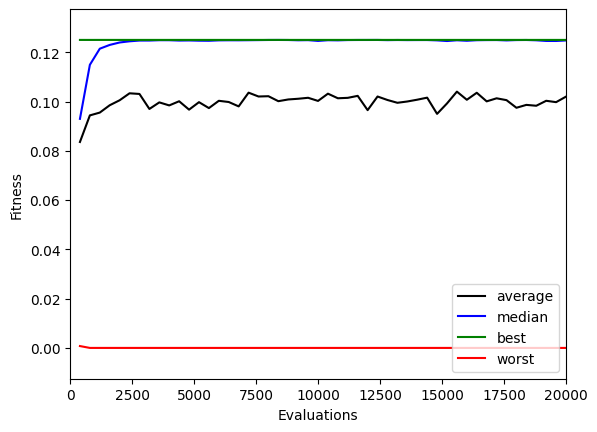

In [85]:
def generate(random = None, args = None):
    return np.random.uniform(low=0, high=1, size=1)

def evaluate(candidates, args = None):
    fitness = []
    for candidate in candidates:
        b = candidate[0]
        h = (1 - b) / 2
        fitness.append(b * h)
    return fitness

rand = Random()
ga = ec.GA(rand)
ga.terminator = ec.terminators.evaluation_termination
ga.variator = [ec.variators.arithmetic_crossover, ec.variators.gaussian_mutation]
ga.observer = ec.observers.plot_observer
population = ga.evolve(
    generator=generate,
    evaluator=evaluate,
    selector = ec.selectors.fitness_proportionate_selection,
    pop_size=400,
    maximize=True, # Maximize
    bounder=ec.Bounder(0, 1),
    max_evaluations=20000,
    mutation_rate=0.25)
population.sort(reverse=True)

print(f"Route: {population[0].candidate}\nDistance: {population[0].fitness}")

### Question 3: The Football Stadium
The local sports club wants to build a new stadium. The perimeter of the sports field should be `400m`, and at the same time we want to ensure that the central midfield has a maximum surface area. Determine the ideal length and width ratio.

$$ \text{Maximize } L \cdot B $$

![The Football Stadium](Images/theFootballStadium.png)

#### 3.1. Simulated Annealing

In [84]:
class TheFootballStadium(Annealer):
    def energy(self):
        l = self.state[0]
        b = 400 - 2 * l
        area = l * b
        return -area

    def move(self):
        l = self.state[0]
        l += np.random.normal(0, 0.1)
        self.state[0] = np.clip(l, 0, 200)

initial_state = np.random.uniform(0, 200, size=1)
route, distance = TheFootballStadium(initial_state).anneal()

print(f"Route: {route}\nDistance: {-distance}")

L = route[0]
B = 200 - L
max_area = L * B

print(f"\nOptimal Width (L): {L:.2f} m")
print(f"Optimal Height (B): {B:.2f} m")
print(f"Maximum Area: {max_area:.2f} m^2")

 Temperature        Energy    Accept   Improve     Elapsed   Remaining


Route: [100.00013531]
Distance: 19999.999999963384

Optimal Width (L): 100.00 m
Optimal Height (B): 100.00 m
Maximum Area: 10000.00 m^2


#### 3.2. Genetisch Algoritme

Route: [100.00000349]
Distance: 19999.999999999975


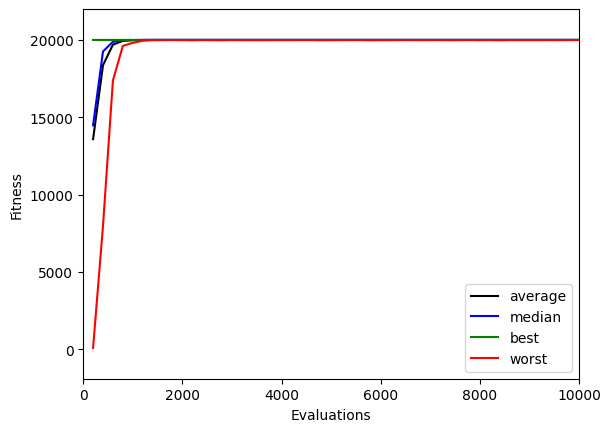

In [104]:
def generate(random = None, args = None):
    return np.random.uniform(low=0, high=200, size=1)

def evaluate(candidates, args = None):
    fitness = []
    for candidate in candidates:
        l = candidate[0]
        b = 400 - 2 * l
        area = l * b
        fitness.append(area)
    return fitness

rand = Random()
ga = ec.GA(rand)
ga.terminator = ec.terminators.evaluation_termination
ga.variator = [ec.variators.arithmetic_crossover, ec.variators.gaussian_mutation]
ga.observer = ec.observers.plot_observer
population = ga.evolve(
    generator=generate,
    evaluator=evaluate,
    selector = ec.selectors.fitness_proportionate_selection,
    pop_size=200,
    maximize=True, # Maximize
    bounder=ec.Bounder(0, 200),
    max_evaluations=10000,
    mutation_rate=0.25)
population.sort(reverse=True)

print(f"Route: {population[0].candidate}\nDistance: {population[0].fitness}")

### Question 4: Optimization problem

Given the following objective function to be maximized:


$ obj = 0.2 + x_1^2 + x_2^2 - 0.1 \cos(6\pi x_1) - 0.1 \cos(6\pi x_2) $


With the following restrictions: $-1.0 \leq x_i \leq 1.0$ met $i=1,2$

Find a good solution.

#### 4.1. Simulated Annealing

In [82]:
class OptimalisatieProblem(Annealer):
    def energy(self):
        x = self.state[0]
        y = self.state[1]
        return -(0.2 + x**2 + y**2 - 0.1 * math.cos(6 * math.pi * x) - 0.1 * math.cos(6 * math.pi * y))

    def move(self):
        i = np.random.randint(0,2)
        self.state[i] += np.random.normal(0, 0.1)
        self.state[i] = np.clip(self.state[i], -1, 1)

initial_state = np.random.uniform(-1,1, size=2)
route, distance = OptimalisatieProblem(initial_state).anneal()

print(f"Route: {route}\nDistance: {-distance}")

 Temperature        Energy    Accept   Improve     Elapsed   Remaining


Route: [-1. -1.]
Distance: 2.0


#### 4.2. Genetisch Algoritme

Route: [ 1. -1.]
Distance: 2.0


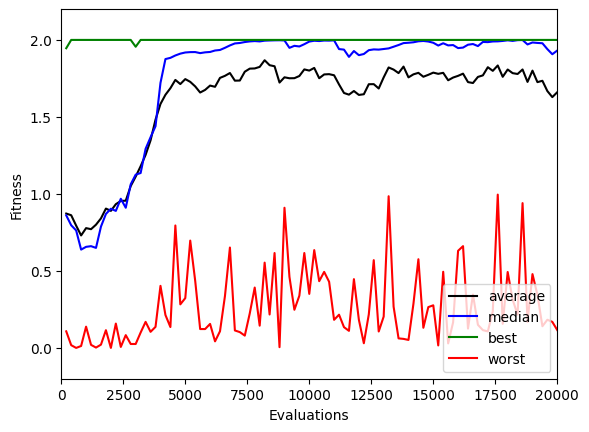

In [83]:
def generate(random = None, args = None):
    return np.random.uniform(low=-1, high=1, size=2)

def evaluate(candidates, args = None):
    fitness = []
    for candidate in candidates:
        fitness.append(0.2 + candidate[0]**2 + candidate[1]**2 - 0.1 * math.cos(6 * math.pi * candidate[0]) - 0.1 * math.cos(6 * math.pi * candidate[1]))
    return fitness

rand = Random()
ga = ec.GA(rand)
ga.terminator = ec.terminators.evaluation_termination
ga.variator = [ec.variators.arithmetic_crossover, ec.variators.gaussian_mutation]
ga.observer = ec.observers.plot_observer
population = ga.evolve(
    generator=generate,
    evaluator=evaluate,
    selector = ec.selectors.fitness_proportionate_selection,
    pop_size=200,
    maximize=True, # Maximize
    bounder=ec.Bounder(-1, 1),
    max_evaluations=20000,
    mutation_rate=0.25)
population.sort(reverse=True)

print(f"Route: {population[0].candidate}\nDistance: {population[0].fitness}")

### Question 5: Quiz

1. Hebben bovengemiddelde chromosomen altijd een beter nageslacht? 
2. Kan je met cross-over de hele zoekruimte verkennen? Zijn er beperkingen van deze verkenning?
3. Waarom speelt de kans op mutatie een belangrijke rol?
4. Waarom start je bij Simulated Annealing het best met een gerandomiseerde vector?
5. Waarom moet de temperatuur bij simulated annealing afnemen?

### General explanation:

What is what?
- The output `Route` is the solution of the problem.
- The output `Distance` is the value of the objective function.
- The `energy` method is the objective function. (Or `Fitheid` in Dutch)
- The `move` method is the function that identifies other solution(s) somewhere in the solution space.
- The `initial_state` is the random initial solution.
- The `anneal` method is the function that starts the annealing process.
- The `objective function` is the function that we want to maximize or minimize so `energy` method is the objective function.

```python
ga.variator = [ec.variators.arithmetic_crossover, ec.variators.gaussian_mutation] # 1
ga.variator = [ec.variators.n_point_crossover, ec.variators.bit_flip_mutation] # 2
```

1. The `ec.variators.gaussian_mutation` is a mutation operator that applies a Gaussian mutation to the selected candidate. The `ec.variators.arithmetic_crossover` is a crossover operator that applies an arithmetic crossover to the selected candidates.
2. The `ec.variators.bit_flip_mutation` is a mutation operator that applies a bit flip mutation to the selected candidate. The `ec.variators.n_point_crossover` is a crossover operator that applies an n-point crossover to the selected candidates.